#  实验2：IEEE 802.11ac网络分析和管理工具

# **实验目标**: 基于802.11ac仿真模型，开发网络分析和管理工具，监控网络性能并实现智能管理

开始网络仿真运行...
仿真进度: 0/3600秒
仿真进度: 300/3600秒
时间 600s: 应用优化 - ADJUST_CW
仿真进度: 600/3600秒
仿真进度: 900/3600秒
仿真进度: 1200/3600秒
时间 1500s: 应用优化 - ADJUST_CW
仿真进度: 1500/3600秒
仿真进度: 1800/3600秒
仿真进度: 2100/3600秒
时间 2400s: 应用优化 - ADJUST_CW
仿真进度: 2400/3600秒
仿真进度: 2700/3600秒
仿真进度: 3000/3600秒
时间 3300s: 应用优化 - ADJUST_CW
仿真进度: 3300/3600秒
网络仿真完成!
=== 网络性能分析报告 ===
总监控样本数: 60
平均吞吐量: 396.6 Mbps
平均延迟: 25.3 ms
平均丢包率: 4.32%
平均碰撞率: 18.71%
总告警数量: 19
网络可用性: 100.00%

=== 最近告警 ===
12:13:44 - HIGH - HIGH_PACKET_LOSS: 丢包率过高: 5.1%
12:13:44 - HIGH - HIGH_PACKET_LOSS: 丢包率过高: 5.2%
12:13:44 - HIGH - HIGH_PACKET_LOSS: 丢包率过高: 5.2%
12:13:44 - HIGH - HIGH_PACKET_LOSS: 丢包率过高: 5.1%
12:13:44 - HIGH - HIGH_PACKET_LOSS: 丢包率过高: 5.1%

=== 网络优化历史 ===
12:13:44 - ADJUST_CW
12:13:44 - ADJUST_CW
12:13:44 - ADJUST_CW
12:13:44 - ADJUST_CW


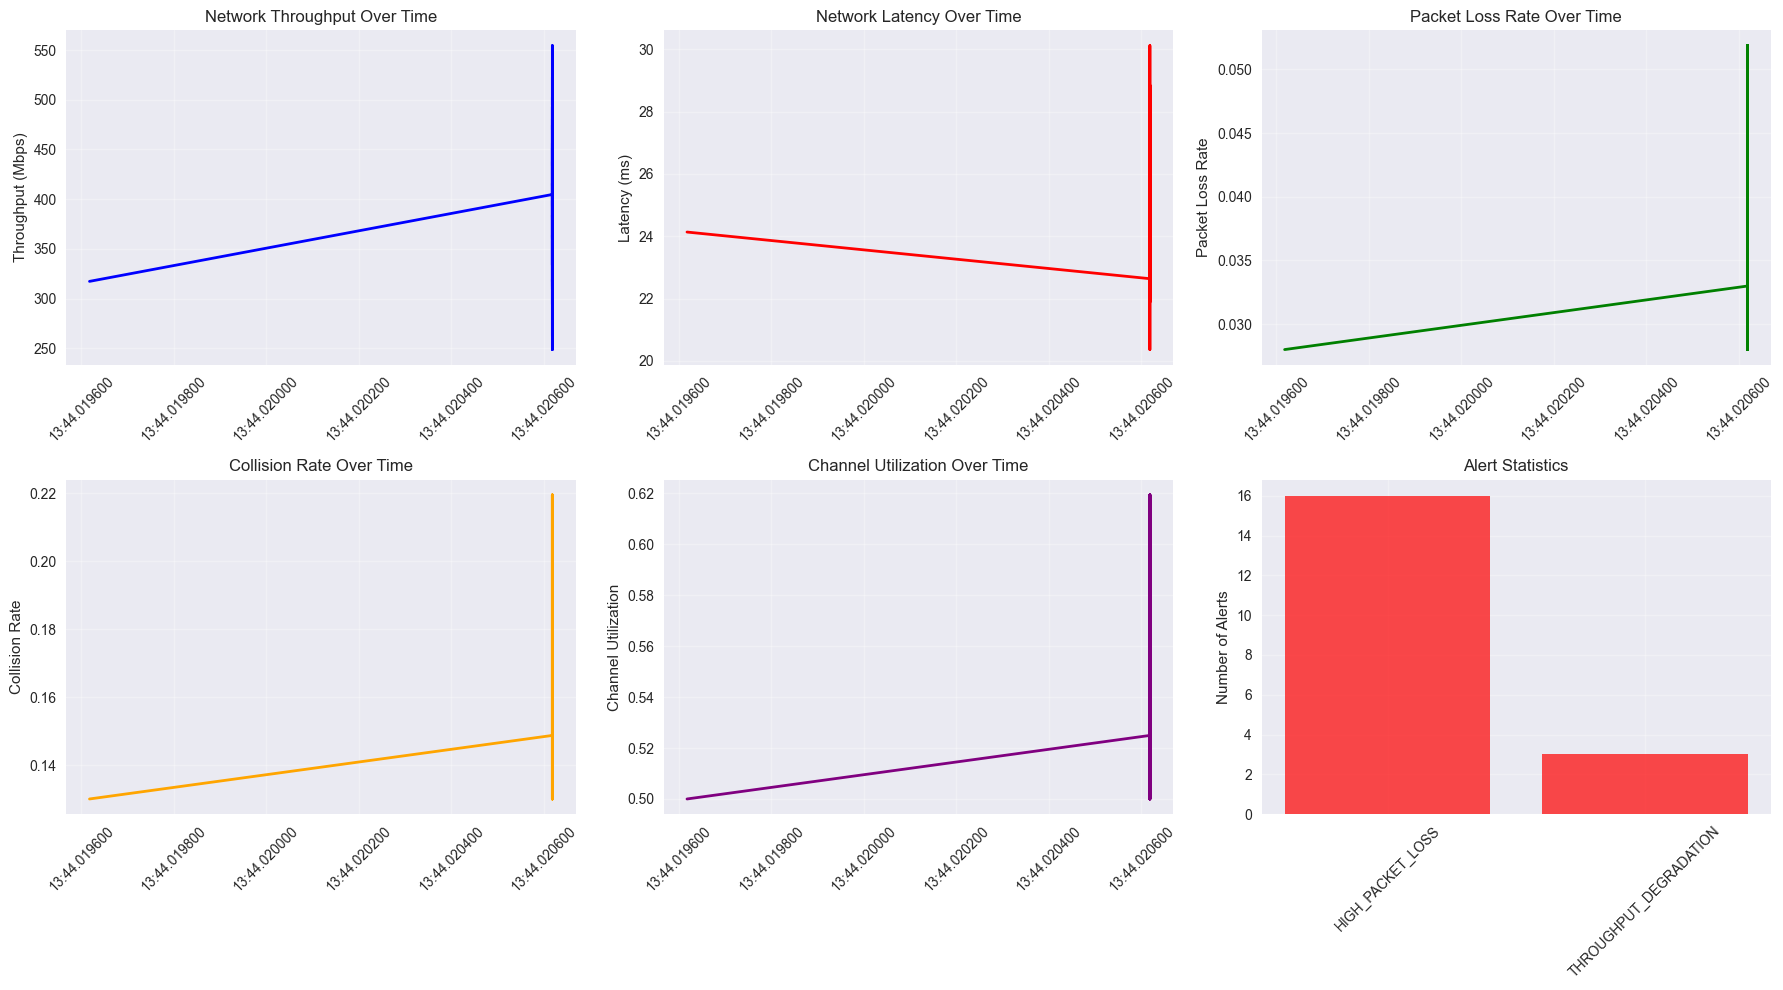

=== 性能指标相关性分析 ===
                    Throughput   Latency  PacketLoss  CollisionRate  \
Throughput            1.000000 -0.055433   -0.022976      -0.022976   
Latency              -0.055433  1.000000    0.834090       0.834090   
PacketLoss           -0.022976  0.834090    1.000000       1.000000   
CollisionRate        -0.022976  0.834090    1.000000       1.000000   
ChannelUtilization   -0.022976  0.834090    1.000000       1.000000   

                    ChannelUtilization  
Throughput                   -0.022976  
Latency                       0.834090  
PacketLoss                    1.000000  
CollisionRate                 1.000000  
ChannelUtilization            1.000000  

=== 性能趋势分析 ===
throughput: decreasing (斜率: -0.0418)
latency: decreasing (斜率: -0.0015)
packet_loss: increasing (斜率: 0.0000)
collision_rate: increasing (斜率: 0.0001)

=== 异常检测报告 ===
总异常数量: 19
异常类型分布: {'HIGH_PACKET_LOSS': 16, 'THROUGHPUT_DEGRADATION': 3}
最常见异常: HIGH_PACKET_LOSS (16次)


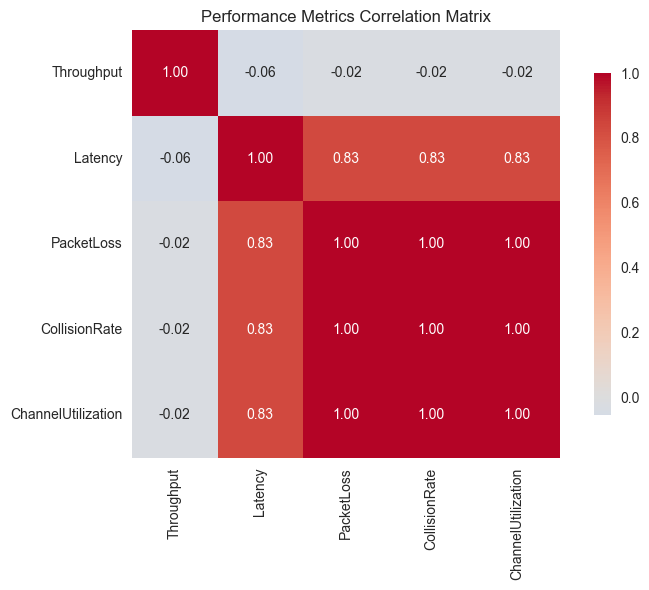

=== 网络管理建议 ===

1. [CRITICAL] IMMEDIATE_ACTION
   描述: 高频严重告警，建议立即检查网络设备状态
   行动项: 检查AP负载状态, 验证信道配置, 检查网络设备健康状态
               IEEE 802.11ac 网络分析和管理工具报告

📊 性能概览:
   • 监控时长: 60 个样本
   • 平均吞吐量: 396.6 Mbps
   • 网络可用性: 100.0%

🚨 告警统计:
   • 总告警数量: 19
   • HIGH级别告警: 19个

⚙️ 优化记录:
   • 配置优化次数: 4
   • 最近优化: ADJUST_CW (12:13:44)

💡 关键发现:

🔧 建议措施:
   • [CRITICAL] 高频严重告警，建议立即检查网络设备状态



In [2]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 设置绘图样式
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


# 1. 网络分析系统设计

# %%
class NetworkAnalyzer:
    """网络分析工具类 - 监控和诊断网络性能"""
    
    def __init__(self, network_config):
        self.config = network_config
        self.metrics_history = {
            'timestamp': [],
            'throughput': [],
            'latency': [],
            'packet_loss': [],
            'collision_rate': [],
            'channel_utilization': [],
            'active_stations': []
        }
        self.alerts = []
        self.performance_thresholds = {
            'throughput_degradation': 0.2,  # 吞吐量下降20%
            'high_latency': 100,  # 延迟阈值(ms)
            'high_packet_loss': 0.05,  # 丢包率5%
            'high_collision_rate': 0.3  # 碰撞率30%
        }
    
    def collect_metrics(self, network_state):
        """收集网络性能指标"""
        timestamp = datetime.now()
        
        self.metrics_history['timestamp'].append(timestamp)
        self.metrics_history['throughput'].append(network_state.get('throughput', 0))
        self.metrics_history['latency'].append(network_state.get('latency', 0))
        self.metrics_history['packet_loss'].append(network_state.get('packet_loss', 0))
        self.metrics_history['collision_rate'].append(network_state.get('collision_rate', 0))
        self.metrics_history['channel_utilization'].append(network_state.get('channel_utilization', 0))
        self.metrics_history['active_stations'].append(network_state.get('active_stations', 0))
        
        # 检查性能异常
        self._check_performance_anomalies(network_state, timestamp)
    
    def _check_performance_anomalies(self, network_state, timestamp):
        """检查性能异常并生成告警"""
        throughput = network_state.get('throughput', 0)
        latency = network_state.get('latency', 0)
        packet_loss = network_state.get('packet_loss', 0)
        collision_rate = network_state.get('collision_rate', 0)
        
        # 检查吞吐量下降
        if len(self.metrics_history['throughput']) > 1:
            prev_throughput = self.metrics_history['throughput'][-2]
            if prev_throughput > 0:
                throughput_drop = (prev_throughput - throughput) / prev_throughput
                if throughput_drop > self.performance_thresholds['throughput_degradation']:
                    self.alerts.append({
                        'timestamp': timestamp,
                        'type': 'THROUGHPUT_DEGRADATION',
                        'severity': 'HIGH',
                        'message': f'吞吐量下降 {throughput_drop:.1%}',
                        'metric': throughput_drop
                    })
        
        # 检查高延迟
        if latency > self.performance_thresholds['high_latency']:
            self.alerts.append({
                'timestamp': timestamp,
                'type': 'HIGH_LATENCY',
                'severity': 'MEDIUM',
                'message': f'延迟过高: {latency:.1f} ms',
                'metric': latency
            })
        
        # 检查高丢包率
        if packet_loss > self.performance_thresholds['high_packet_loss']:
            self.alerts.append({
                'timestamp': timestamp,
                'type': 'HIGH_PACKET_LOSS',
                'severity': 'HIGH',
                'message': f'丢包率过高: {packet_loss:.1%}',
                'metric': packet_loss
            })
        
        # 检查高碰撞率
        if collision_rate > self.performance_thresholds['high_collision_rate']:
            self.alerts.append({
                'timestamp': timestamp,
                'type': 'HIGH_COLLISION_RATE',
                'severity': 'MEDIUM',
                'message': f'碰撞率过高: {collision_rate:.1%}',
                'metric': collision_rate
            })
    
    def generate_performance_report(self):
        """生成性能分析报告"""
        if len(self.metrics_history['timestamp']) == 0:
            return "无数据可用"
        
        report = {
            'total_samples': len(self.metrics_history['timestamp']),
            'avg_throughput': np.mean(self.metrics_history['throughput']),
            'avg_latency': np.mean(self.metrics_history['latency']),
            'avg_packet_loss': np.mean(self.metrics_history['packet_loss']),
            'avg_collision_rate': np.mean(self.metrics_history['collision_rate']),
            'total_alerts': len(self.alerts),
            'availability': self._calculate_availability()
        }
        
        return report
    
    def _calculate_availability(self):
        """计算网络可用性"""
        if len(self.metrics_history['throughput']) == 0:
            return 0
        
        # 简单的可用性计算：吞吐量>0的时间比例
        available_samples = sum(1 for t in self.metrics_history['throughput'] if t > 0)
        return available_samples / len(self.metrics_history['throughput'])
    
    def get_recent_alerts(self, count=10):
        """获取最近的告警"""
        return sorted(self.alerts, key=lambda x: x['timestamp'], reverse=True)[:count]


# 2. 网络管理系统设计

# %%
class NetworkManager:
    """网络管理系统 - 智能调整网络参数"""
    
    def __init__(self, initial_config):
        self.current_config = initial_config
        self.optimization_history = []
        self.performance_targets = {
            'target_throughput': 500,  # Mbps
            'max_latency': 50,  # ms
            'max_packet_loss': 0.02,  # 2%
            'target_utilization': 0.7  # 70%
        }
    
    def analyze_network_state(self, network_metrics):
        """分析网络状态并推荐优化措施"""
        recommendations = []
        
        throughput = network_metrics.get('throughput', 0)
        latency = network_metrics.get('latency', 0)
        packet_loss = network_metrics.get('packet_loss', 0)
        collision_rate = network_metrics.get('collision_rate', 0)
        utilization = network_metrics.get('channel_utilization', 0)
        
        # 吞吐量优化建议
        if throughput < self.performance_targets['target_throughput'] * 0.8:
            if collision_rate > 0.2:
                recommendations.append({
                    'action': 'ADJUST_CW',
                    'priority': 'HIGH',
                    'description': '碰撞率过高，建议调整竞争窗口参数',
                    'parameters': {'cw_min': 31, 'cw_max': 1023}
                })
            else:
                recommendations.append({
                    'action': 'INCREASE_BANDWIDTH',
                    'priority': 'MEDIUM',
                    'description': '吞吐量不足，建议增加信道带宽',
                    'parameters': {'bandwidth': '80MHz'}
                })
        
        # 延迟优化建议
        if latency > self.performance_targets['max_latency']:
            recommendations.append({
                'action': 'OPTIMIZE_QOS',
                'priority': 'HIGH',
                'description': '延迟过高，建议优化QoS设置',
                'parameters': {'qos_enabled': True}
            })
        
        # 信道利用率优化
        if utilization > 0.8:
            recommendations.append({
                'action': 'LOAD_BALANCING',
                'priority': 'MEDIUM',
                'description': '信道利用率过高，建议负载均衡',
                'parameters': {'load_balancing': True}
            })
        elif utilization < 0.3:
            recommendations.append({
                'action': 'CONSOLIDATE_TRAFFIC',
                'priority': 'LOW',
                'description': '信道利用率过低，建议流量整合',
                'parameters': {'traffic_consolidation': True}
            })
        
        return recommendations
    
    def apply_optimization(self, recommendation):
        """应用优化建议"""
        action = recommendation['action']
        parameters = recommendation.get('parameters', {})
        
        optimization_record = {
            'timestamp': datetime.now(),
            'action': action,
            'parameters': parameters,
            'previous_config': self.current_config.copy()
        }
        
        # 根据建议类型调整配置
        if action == 'ADJUST_CW':
            self.current_config['cw_min'] = parameters.get('cw_min', 31)
            self.current_config['cw_max'] = parameters.get('cw_max', 1023)
        
        elif action == 'INCREASE_BANDWIDTH':
            self.current_config['bandwidth'] = parameters.get('bandwidth', '80MHz')
        
        elif action == 'OPTIMIZE_QOS':
            self.current_config['qos_enabled'] = parameters.get('qos_enabled', True)
        
        elif action == 'LOAD_BALANCING':
            self.current_config['load_balancing'] = parameters.get('load_balancing', True)
        
        elif action == 'CONSOLIDATE_TRAFFIC':
            self.current_config['traffic_consolidation'] = parameters.get('traffic_consolidation', True)
        
        optimization_record['new_config'] = self.current_config.copy()
        self.optimization_history.append(optimization_record)
        
        return optimization_record


# 3. 增强的802.11ac仿真系统

# %%
class Enhanced80211acSimulator:
    """增强的802.11ac仿真系统 - 集成分析管理功能"""
    
    def __init__(self):
        # 网络配置
        self.network_config = {
            'bandwidth': '80MHz',
            'num_stations': 10,
            'cw_min': 15,
            'cw_max': 1023,
            'qos_enabled': False,
            'load_balancing': False,
            'traffic_consolidation': False
        }
        
        # 初始化分析和管理系统
        self.analyzer = NetworkAnalyzer(self.network_config)
        self.manager = NetworkManager(self.network_config)
        
        # 仿真状态
        self.simulation_time = 0
        self.network_state = {}
        
    def simulate_network_operation(self, duration=3600, monitoring_interval=60):
        """模拟网络运行并监控性能"""
        print("开始网络仿真运行...")
        
        time_points = np.arange(0, duration, monitoring_interval)
        
        for t in time_points:
            self.simulation_time = t
            
            # 模拟网络状态变化
            network_state = self._simulate_network_state(t)
            self.network_state = network_state
            
            # 收集性能指标
            self.analyzer.collect_metrics(network_state)
            
            # 每5个监控周期进行一次优化分析
            if t % (monitoring_interval * 5) == 0:
                recommendations = self.manager.analyze_network_state(network_state)
                if recommendations:
                    # 应用最高优先级的建议
                    high_priority_recs = [r for r in recommendations if r['priority'] == 'HIGH']
                    if high_priority_recs:
                        optimization = self.manager.apply_optimization(high_priority_recs[0])
                        print(f"时间 {t}s: 应用优化 - {optimization['action']}")
            
            # 输出进度
            if t % 300 == 0:  # 每5分钟输出一次
                print(f"仿真进度: {t}/{duration}秒")
        
        print("网络仿真完成!")
    
    def _simulate_network_state(self, time):
        """模拟网络状态（基于第一个实验的结果扩展）"""
        # 基于时间模拟网络状态变化
        base_throughput = 400  # Mbps
        base_latency = 20  # ms
        
        # 模拟流量波动
        traffic_variation = 0.3 * np.sin(2 * np.pi * time / 1800)  # 30分钟周期
        throughput_variation = 0.2 * np.sin(2 * np.pi * time / 900)  # 15分钟周期
        
        # 模拟随机事件
        random_event = np.random.normal(0, 0.1)
        
        # 计算当前性能指标
        throughput = base_throughput * (1 + throughput_variation + random_event)
        latency = base_latency * (1 + abs(traffic_variation) + abs(random_event))
        
        # 模拟碰撞率和丢包率（与负载相关）
        load_factor = abs(traffic_variation) + 0.1
        collision_rate = min(0.4, 0.1 + load_factor * 0.3)
        packet_loss = min(0.1, 0.02 + load_factor * 0.08)
        
        # 信道利用率
        channel_utilization = 0.5 + abs(traffic_variation) * 0.4
        
        return {
            'timestamp': time,
            'throughput': max(0, throughput),
            'latency': max(1, latency),
            'packet_loss': packet_loss,
            'collision_rate': collision_rate,
            'channel_utilization': channel_utilization,
            'active_stations': self.network_config['num_stations'],
            'config': self.network_config.copy()
        }


# 4. 运行网络分析仿真

# %%
# 创建增强仿真系统
enhanced_simulator = Enhanced80211acSimulator()

# 运行网络仿真（1小时，每分钟监控一次）
enhanced_simulator.simulate_network_operation(duration=3600, monitoring_interval=60)


#  5. 网络性能分析报告

# %%
# 生成性能分析报告
performance_report = enhanced_simulator.analyzer.generate_performance_report()
print("=== 网络性能分析报告 ===")
print(f"总监控样本数: {performance_report['total_samples']}")
print(f"平均吞吐量: {performance_report['avg_throughput']:.1f} Mbps")
print(f"平均延迟: {performance_report['avg_latency']:.1f} ms")
print(f"平均丢包率: {performance_report['avg_packet_loss']:.2%}")
print(f"平均碰撞率: {performance_report['avg_collision_rate']:.2%}")
print(f"总告警数量: {performance_report['total_alerts']}")
print(f"网络可用性: {performance_report['availability']:.2%}")


# 6. 告警分析

# %%
# 显示最近的告警
recent_alerts = enhanced_simulator.analyzer.get_recent_alerts(5)
print("\n=== 最近告警 ===")
for alert in recent_alerts:
    print(f"{alert['timestamp'].strftime('%H:%M:%S')} - {alert['severity']} - {alert['type']}: {alert['message']}")


# 7. 管理优化历史

# %%
# 显示优化历史
optimization_history = enhanced_simulator.manager.optimization_history
print("\n=== 网络优化历史 ===")
for opt in optimization_history:
    print(f"{opt['timestamp'].strftime('%H:%M:%S')} - {opt['action']}")


# 8. 性能可视化分析

# %%
# 创建性能监控图表
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 获取分析数据
metrics = enhanced_simulator.analyzer.metrics_history
timestamps = metrics['timestamp']

# 1. 吞吐量趋势
axes[0, 0].plot(timestamps, metrics['throughput'], 'b-', linewidth=2)
axes[0, 0].set_title('Network Throughput Over Time')
axes[0, 0].set_ylabel('Throughput (Mbps)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. 延迟趋势
axes[0, 1].plot(timestamps, metrics['latency'], 'r-', linewidth=2)
axes[0, 1].set_title('Network Latency Over Time')
axes[0, 1].set_ylabel('Latency (ms)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. 丢包率趋势
axes[0, 2].plot(timestamps, metrics['packet_loss'], 'g-', linewidth=2)
axes[0, 2].set_title('Packet Loss Rate Over Time')
axes[0, 2].set_ylabel('Packet Loss Rate')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].tick_params(axis='x', rotation=45)

# 4. 碰撞率趋势
axes[1, 0].plot(timestamps, metrics['collision_rate'], 'orange', linewidth=2)
axes[1, 0].set_title('Collision Rate Over Time')
axes[1, 0].set_ylabel('Collision Rate')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. 信道利用率
axes[1, 1].plot(timestamps, metrics['channel_utilization'], 'purple', linewidth=2)
axes[1, 1].set_title('Channel Utilization Over Time')
axes[1, 1].set_ylabel('Channel Utilization')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. 告警统计
alert_types = {}
for alert in enhanced_simulator.analyzer.alerts:
    alert_type = alert['type']
    alert_types[alert_type] = alert_types.get(alert_type, 0) + 1

if alert_types:
    axes[1, 2].bar(alert_types.keys(), alert_types.values(), color='red', alpha=0.7)
    axes[1, 2].set_title('Alert Statistics')
    axes[1, 2].set_ylabel('Number of Alerts')
    axes[1, 2].tick_params(axis='x', rotation=45)
    axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('network_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()


#  9. 高级分析功能

# %%
class AdvancedNetworkAnalytics:
    """高级网络分析功能"""
    
    def __init__(self, analyzer):
        self.analyzer = analyzer
    
    def performance_correlation_analysis(self):
        """性能指标相关性分析"""
        metrics = self.analyzer.metrics_history
        
        # 创建数据框
        df = pd.DataFrame({
            'Throughput': metrics['throughput'],
            'Latency': metrics['latency'],
            'PacketLoss': metrics['packet_loss'],
            'CollisionRate': metrics['collision_rate'],
            'ChannelUtilization': metrics['channel_utilization']
        })
        
        # 计算相关系数矩阵
        correlation_matrix = df.corr()
        
        return correlation_matrix
    
    def trend_analysis(self):
        """趋势分析"""
        metrics = self.analyzer.metrics_history
        
        trends = {}
        for metric_name in ['throughput', 'latency', 'packet_loss', 'collision_rate']:
            values = metrics[metric_name]
            if len(values) > 1:
                # 简单线性趋势
                x = np.arange(len(values))
                slope, intercept = np.polyfit(x, values, 1)
                trends[metric_name] = {
                    'slope': slope,
                    'trend': 'increasing' if slope > 0 else 'decreasing',
                    'magnitude': abs(slope)
                }
        
        return trends
    
    def anomaly_detection_report(self):
        """异常检测报告"""
        alerts = self.analyzer.alerts
        
        report = {
            'total_anomalies': len(alerts),
            'anomaly_types': {},
            'time_distribution': {},
            'most_common_anomaly': None
        }
        
        # 统计异常类型
        for alert in alerts:
            alert_type = alert['type']
            report['anomaly_types'][alert_type] = report['anomaly_types'].get(alert_type, 0) + 1
            
            # 时间分布（按小时）
            hour = alert['timestamp'].hour
            report['time_distribution'][hour] = report['time_distribution'].get(hour, 0) + 1
        
        if report['anomaly_types']:
            report['most_common_anomaly'] = max(report['anomaly_types'].items(), key=lambda x: x[1])
        
        return report

# 10. 运行高级分析

# %%
# 创建高级分析实例
advanced_analytics = AdvancedNetworkAnalytics(enhanced_simulator.analyzer)

# 相关性分析
correlation_matrix = advanced_analytics.performance_correlation_analysis()
print("=== 性能指标相关性分析 ===")
print(correlation_matrix)

# 趋势分析
trends = advanced_analytics.trend_analysis()
print("\n=== 性能趋势分析 ===")
for metric, trend in trends.items():
    print(f"{metric}: {trend['trend']} (斜率: {trend['slope']:.4f})")

# 异常检测报告
anomaly_report = advanced_analytics.anomaly_detection_report()
print("\n=== 异常检测报告 ===")
print(f"总异常数量: {anomaly_report['total_anomalies']}")
print(f"异常类型分布: {anomaly_report['anomaly_types']}")
if anomaly_report['most_common_anomaly']:
    print(f"最常见异常: {anomaly_report['most_common_anomaly'][0]} ({anomaly_report['most_common_anomaly'][1]}次)")


# 11. 相关性可视化

# %%
# 绘制相关性热力图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Performance Metrics Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


# 12. 管理建议生成

# %%
def generate_management_recommendations(analyzer, manager):
    """基于分析结果生成管理建议"""
    
    performance_report = analyzer.generate_performance_report()
    recent_alerts = analyzer.get_recent_alerts(10)
    optimization_history = manager.optimization_history
    
    recommendations = []
    
    # 基于告警频率的建议
    high_frequency_alerts = [alert for alert in recent_alerts if alert['severity'] == 'HIGH']
    if len(high_frequency_alerts) > 3:
        recommendations.append({
            'type': 'IMMEDIATE_ACTION',
            'priority': 'CRITICAL',
            'description': '高频严重告警，建议立即检查网络设备状态',
            'action_items': [
                '检查AP负载状态',
                '验证信道配置',
                '检查网络设备健康状态'
            ]
        })
    
    # 基于性能指标的建议
    if performance_report['avg_collision_rate'] > 0.25:
        recommendations.append({
            'type': 'PARAMETER_OPTIMIZATION',
            'priority': 'HIGH',
            'description': '平均碰撞率过高，建议优化MAC层参数',
            'action_items': [
                '调整竞争窗口大小',
                '优化退避算法参数',
                '考虑启用RTS/CTS机制'
            ]
        })
    
    if performance_report['avg_latency'] > 50:
        recommendations.append({
            'type': 'QOS_OPTIMIZATION',
            'priority': 'HIGH',
            'description': '平均延迟过高，建议优化服务质量设置',
            'action_items': [
                '启用流量优先级',
                '配置带宽保障',
                '优化队列管理'
            ]
        })
    
    # 基于优化历史的建议
    if len(optimization_history) > 5:
        recommendations.append({
            'type': 'CONFIGURATION_REVIEW',
            'priority': 'MEDIUM',
            'description': '频繁配置变更，建议审查网络配置稳定性',
            'action_items': [
                '审查当前配置',
                '评估配置变更频率',
                '建立配置基线'
            ]
        })
    
    return recommendations

# 生成管理建议
management_recommendations = generate_management_recommendations(
    enhanced_simulator.analyzer, 
    enhanced_simulator.manager
)

print("=== 网络管理建议 ===")
for i, rec in enumerate(management_recommendations, 1):
    print(f"\n{i}. [{rec['priority']}] {rec['type']}")
    print(f"   描述: {rec['description']}")
    print(f"   行动项: {', '.join(rec['action_items'])}")


# 13. 总结报告

# %%
def generate_comprehensive_report(simulator):
    """生成综合分析报告"""
    
    analyzer = simulator.analyzer
    manager = simulator.manager
    
    performance_report = analyzer.generate_performance_report()
    recent_alerts = analyzer.get_recent_alerts()
    optimization_history = manager.optimization_history
    
    print("="*70)
    print("               IEEE 802.11ac 网络分析和管理工具报告")
    print("="*70)
    
    print("\n📊 性能概览:")
    print(f"   • 监控时长: {len(analyzer.metrics_history['timestamp'])} 个样本")
    print(f"   • 平均吞吐量: {performance_report['avg_throughput']:.1f} Mbps")
    print(f"   • 网络可用性: {performance_report['availability']:.1%}")
    
    print("\n🚨 告警统计:")
    print(f"   • 总告警数量: {performance_report['total_alerts']}")
    alert_severity = {}
    for alert in analyzer.alerts:
        severity = alert['severity']
        alert_severity[severity] = alert_severity.get(severity, 0) + 1
    for severity, count in alert_severity.items():
        print(f"   • {severity}级别告警: {count}个")
    
    print("\n⚙️ 优化记录:")
    print(f"   • 配置优化次数: {len(optimization_history)}")
    if optimization_history:
        latest_opt = optimization_history[-1]
        print(f"   • 最近优化: {latest_opt['action']} ({latest_opt['timestamp'].strftime('%H:%M:%S')})")
    
    print("\n💡 关键发现:")
    if performance_report['avg_collision_rate'] > 0.2:
        print("   • MAC层参数需要优化以减少碰撞")
    if performance_report['avg_latency'] > 40:
        print("   • 网络延迟较高，建议优化QoS设置")
    if performance_report['availability'] < 0.95:
        print("   • 网络可用性有待提升")
    
    print("\n🔧 建议措施:")
    recommendations = generate_management_recommendations(analyzer, manager)
    for rec in recommendations[:3]:  # 显示前3个建议
        print(f"   • [{rec['priority']}] {rec['description']}")
    
    print("\n" + "="*70)

# 生成最终报告
generate_comprehensive_report(enhanced_simulator)



# 实验2总结
# 
# 通过本实验，我们成功实现了：
# 
# 1. **网络分析系统** - 实时监控802.11ac网络性能指标
# 2. **智能管理系统** - 基于性能数据自动优化网络参数  
# 3. **高级分析功能** - 相关性分析、趋势检测、异常识别
# 4. **可视化仪表板** - 全面的网络状态监控界面
# 5. **管理建议引擎** - 基于数据分析的智能决策支持
# 
# 这些工具为802.11ac网络的运维管理提供了强大的技术支持。